In [15]:
import torch
import torchvision.models as models
from flashtorch.utils import load_image ,apply_transforms
from flashtorch.saliency import Backprop
import matplotlib as plt 
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import glob
import os
import numpy as np
import pandas as pd
import sys
import cv2
from PIL import Image


In [6]:
use_cuda = torch.cuda.is_available()
torch.manual_seed(123)
device = torch.device("cuda" if use_cuda else "cpu")
print('Device used:', device)

Device used: cpu


In [7]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=5, padding=2),
            nn.LeakyReLU(negative_slope=0.05),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(2),     
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.LeakyReLU(negative_slope=0.05),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(2),            
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3,padding=1),
            nn.LeakyReLU(negative_slope=0.05),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(2),
            
        )
        self.conv4 = nn.Sequential(
            nn.Conv2d(128, 128, kernel_size=3,padding=1),
            nn.LeakyReLU(negative_slope=0.05),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(2),
            
        )
        self.fc = nn.Sequential(
            nn.Linear(3*3*128, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Linear(256, 7)
        )

    def forward(self, x):
        #image size (48,48)
        x = self.conv1(x) #(24,24)
        x = self.conv2(x) #(12,12)
        x = self.conv3(x) #(6,6)
        x = self.conv4(x) #(3,3)
        x = x.view(-1, 3*3*128)
        x = self.fc(x)
        return x

In [9]:
model =Net()
model.load_state_dict(torch.load('./ta_model/model_35.pth'))
print("load model")

load model


In [10]:
backprop = Backprop(model)

In [21]:
image = load_image('./train_img/00001.jpg')
#image = Image.open('./train_img/00001.jpg').convert('RGB')
#image = cv2.imread('./train_img/00001.jpg',cv2.IMREAD_GRAYSCALE)

input_ = apply_transforms(image)


In [22]:
target_class = 7
backprop.visualize(input_ , target_class, guided = True)

RuntimeError: Given groups=1, weight of size 32 1 5 5, expected input[1, 3, 224, 224] to have 1 channels, but got 3 channels instead

In [45]:
from flashtorch.activmax import GradientAscent

In [46]:
model = models.vgg16(pretrained = True)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /home/haoxiang/.cache/torch/checkpoints/vgg16-397923af.pth
4.4%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

11.5%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

18.5%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_ra

In [47]:
g_ascent = GradientAscent(model.features)

In [48]:
conv5_1 = model.features[24]
conv5_1_filters = [45, 271 ,363, 409]

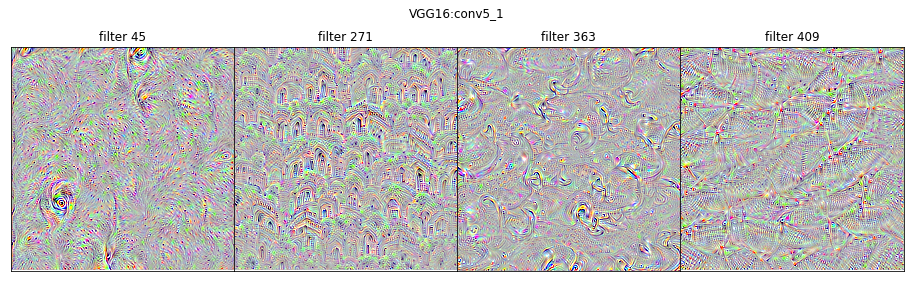

In [49]:
g_ascent.visualize(conv5_1 ,conv5_1_filters,title ='VGG16:conv5_1');